In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
sys.path.append('../')
import model
import cost
import constraints
from scipy.integrate import solve_ivp

In [18]:
x_t = np.zeros(3)
x_t[0] = 0.0
x_t[1] = 2.0
x_t[2] = 0.0
ix = 3
iu = 2
ih = 2
N = 500
delT = 0.1
myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',x_t,N)
myConst = constraints.UnicycleConstraints('Hello',ix,iu,ih)
max_iter = 100

In [19]:
xi = np.zeros(3)
xi[0] = -1.0
xi[1] = 0.0 
xi[2] = np.pi/2

xf = np.zeros(3)
xf[0] = 0.0
xf[1] = 2.0
xf[2] = 0.0

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))

In [20]:
from Scvx import Scvx

In [23]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst)
x, u = i1.update(x0,u0)

iteration   cost        cost_vc   reduction    expected    radius_tr
0           42          500         424         509         10.0        
1           118         1.64e-06    105         97.2        10.0        
2           13.9        0.000126    3.69        4.48        20.0        
3           10.2        4.9e-06     0.739       0.751       20.0        
4           9.5         2.46e-06    0.00551     0.0057      40.0        
5           9.49        2.22e-10    1.33e-05    1.47e-05    80.0        
non-positive expected reduction: should not occur
6           NO STEP     NO STEP     -5.54e-07   -5.31e-07   80.0        
7           9.49        8.08e-09    1.24e-07    1.46e-07    80.0        
SUCCEESS: cost change < tolFun 1.2351039748986407e-07


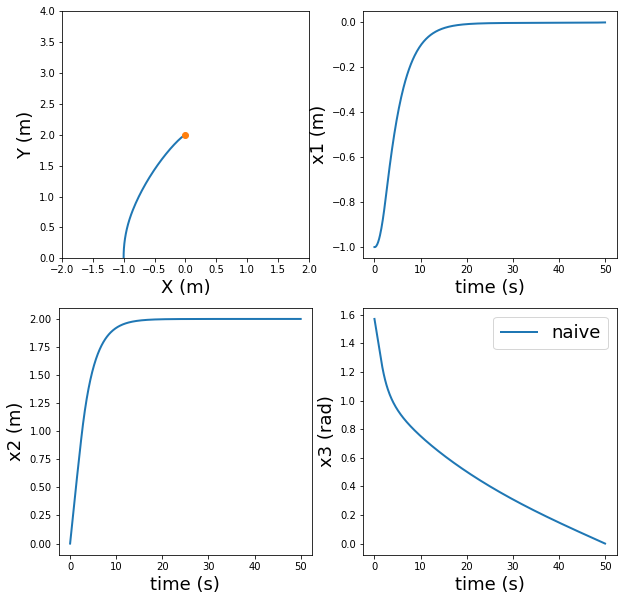

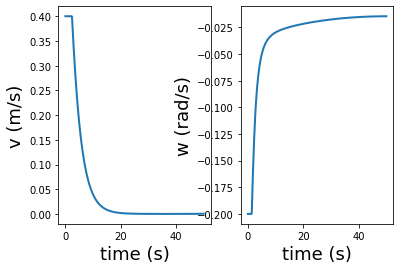

In [25]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-2, 2, 0, 4.0])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [8]:
a = np.vstack((np.ones((10,2)),np.zeros(2)))
print_np(a)

Type is <class 'numpy.ndarray'>
Shape is (11, 2)
